Create a Python script to perform a sentiment analysis of the Twitter activity of various news outlets, and to present your findings visually.

--> Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: **BBC, CBS, CNN, Fox, and New York times**.

---------------------------------------------------------------------------------------------------------
1. The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last **100** tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

--------------------------------------------------------------------------------------------------------
2. The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

--------------------------------------------------------------------------------------------------------

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.

--------------------------------------------------------------------------------------------------------
Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
* Pull into a DataFrame the tweet's source account, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

--------------------------------------------------------------------------------------------------------
As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* Include a written description of THREE observable trends based on the data.
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.


Script
--------------

In [53]:
#Import Dependencies
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
import tweepy

In [54]:
#Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, consumer_secret,
                   access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

Pulling Tweets
-----------------

In [55]:
# Target Account
target_user = "@BBC"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get tweets
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print the text
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Append sentiments for each tweet from @BBC
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter,
                          "Media Outlet": target_user})
        
        # Add to counter 
        counter = counter + 1
        
BBC =pd.DataFrame.from_dict(sentiments)


print(f"-------------------------------------------------------------------------------------------")
print(f"There are {len(BBC)} tweets and their sentiments from BBC collected here")
print(f"-------------------------------------------------------------------------------------------")

BBC.head()

Tweet 1: 🐢 Scientists have found new evidence confirming that turtles once lived without shells.
👉 https://t.co/xLIFJNJdh1 https://t.co/VUcP8zguW7
Tweet 2: A conversation with a homeless man inspired Stephen to attempt the unusual challenge of crossing the Alps on a spac… https://t.co/w6h0Yhe5bf
Tweet 3: 😂 If Britney's songs were Scottish. https://t.co/Em0LRQmbFt
Tweet 4: RT @BBCOne: Be careful who you trust.

#Bodyguard. Continues Sundays at 9pm on @BBCOne. Or available to watch on @BBCiPlayer: https://t.co/…
Tweet 5: RT @BBCiPlayer: Watch the highlights from Reading and Leeds Festivals on BBC iPlayer 🙌 
https://t.co/AfQl9nXavO https://t.co/KGbRUouFCZ
Tweet 6: Once upon a time, two early humans of different ancestry met at a cave in Russia.

50,000 years later, scientists h… https://t.co/oOCBlGLFqQ
Tweet 7: @BBCTravelShow is on @BBCiPlayer now 👉 https://t.co/Sqn5y0xC80
Tweet 8: 🍅 Neighbourhood gardens are providing important access to fresh food in urban areas. https://t.co/wLol6vY5rW

Tweet 81: 🐢 Scientists have found new evidence confirming that turtles once lived without shells.
👉 https://t.co/xLIFJNJdh1 https://t.co/VUcP8zguW7
Tweet 82: A conversation with a homeless man inspired Stephen to attempt the unusual challenge of crossing the Alps on a spac… https://t.co/w6h0Yhe5bf
Tweet 83: 😂 If Britney's songs were Scottish. https://t.co/Em0LRQmbFt
Tweet 84: RT @BBCOne: Be careful who you trust.

#Bodyguard. Continues Sundays at 9pm on @BBCOne. Or available to watch on @BBCiPlayer: https://t.co/…
Tweet 85: RT @BBCiPlayer: Watch the highlights from Reading and Leeds Festivals on BBC iPlayer 🙌 
https://t.co/AfQl9nXavO https://t.co/KGbRUouFCZ
Tweet 86: Once upon a time, two early humans of different ancestry met at a cave in Russia.

50,000 years later, scientists h… https://t.co/oOCBlGLFqQ
Tweet 87: @BBCTravelShow is on @BBCiPlayer now 👉 https://t.co/Sqn5y0xC80
Tweet 88: 🍅 Neighbourhood gardens are providing important access to fresh food in urban areas. https://t.co/wL

,Compound,Date,Media Outlet,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Tue Aug 28 18:56:05 +0000 2018,@BBC,1.000,0.0,0.000,1
1,0.5423,Tue Aug 28 18:03:04 +0000 2018,@BBC,0.780,0.0,0.220,2
2,0.0000,Tue Aug 28 16:01:02 +0000 2018,@BBC,1.000,0.0,0.000,3
3,0.5994,Tue Aug 28 14:51:38 +0000 2018,@BBC,0.795,0.0,0.205,4
4,0.3612,Tue Aug 28 14:51:32 +0000 2018,@BBC,0.848,0.0,0.152,5


In [56]:
# Target Account
target_user = "@CBS"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get tweets
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print the text
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Append sentiments for each tweet from @BBC
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter,
                          "Media Outlet": target_user})
        
        # Add to counter 
        counter = counter + 1
        
CBS =pd.DataFrame.from_dict(sentiments)


print(f"-------------------------------------------------------------------------------------------")
print(f"There are {len(CBS)} tweets and their sentiments from CBS collected here")
print(f"-------------------------------------------------------------------------------------------")

CBS.head()

Tweet 1: It's almost time for sweater weather, pumpkin spice lattes, and CBS Fall TV premieres. Check out the storylines for… https://t.co/BpgDyYl8fc
Tweet 2: RT @cbsallaccess: #NFL preseason coverage is here! 🏈 The Detroit @Lions battle the Tampa Bay @Buccaneers tonight at 8PM ET. Stream the game…
Tweet 3: @bigbangtheory 🎶...happy kitty, sleepy kitty, purr purr purr🎶 #TheBigBangTheory https://t.co/sEObppGJlZ
Tweet 4: This is going to require multiple singings of "Soft Kitty." https://t.co/UdRGNeQ7Lb
Tweet 5: Got to get more of the @PaulMcCartney #CarpoolKaraoke into your life? @latelateshow produced an hour-long bonus spe… https://t.co/DjPqajo6Xn
Tweet 6: How much does it cost to bury the truth? 
#OneDollar premieres August 30, exclusively on CBS All Access. https://t.co/ZL5TBH9ro5
Tweet 7: Things got carried away when @ArianaGrande joined @latelateshow for #CarpoolKaraoke. So did Ariana. #ArianaCarpool https://t.co/WSZcC0TaYz
Tweet 8: RT @cbsallaccess: Murder mystery set in a small t

Tweet 61: It's almost time for sweater weather, pumpkin spice lattes, and CBS Fall TV premieres. Check out the storylines for… https://t.co/BpgDyYl8fc
Tweet 62: RT @cbsallaccess: #NFL preseason coverage is here! 🏈 The Detroit @Lions battle the Tampa Bay @Buccaneers tonight at 8PM ET. Stream the game…
Tweet 63: @bigbangtheory 🎶...happy kitty, sleepy kitty, purr purr purr🎶 #TheBigBangTheory https://t.co/sEObppGJlZ
Tweet 64: This is going to require multiple singings of "Soft Kitty." https://t.co/UdRGNeQ7Lb
Tweet 65: Got to get more of the @PaulMcCartney #CarpoolKaraoke into your life? @latelateshow produced an hour-long bonus spe… https://t.co/DjPqajo6Xn
Tweet 66: How much does it cost to bury the truth? 
#OneDollar premieres August 30, exclusively on CBS All Access. https://t.co/ZL5TBH9ro5
Tweet 67: Things got carried away when @ArianaGrande joined @latelateshow for #CarpoolKaraoke. So did Ariana. #ArianaCarpool https://t.co/WSZcC0TaYz
Tweet 68: RT @cbsallaccess: Murder mystery set in a

,Compound,Date,Media Outlet,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Mon Aug 27 23:36:57 +0000 2018,@CBS,1.000,0.000,0.000,1
1,-0.4389,Fri Aug 24 20:30:16 +0000 2018,@CBS,0.879,0.121,0.000,2
2,0.0000,Wed Aug 22 20:55:25 +0000 2018,@CBS,1.000,0.000,0.000,3
3,0.0000,Wed Aug 22 20:10:12 +0000 2018,@CBS,1.000,0.000,0.000,4
4,0.5423,Mon Aug 20 21:59:56 +0000 2018,@CBS,0.829,0.000,0.171,5


In [57]:
# Target Account
target_user = "@CNN"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get tweets
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print the text
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Append sentiments for each tweet from @BBC
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter,
                          "Media Outlet": target_user})
        
        # Add to counter 
        counter = counter + 1
        
CNN =pd.DataFrame.from_dict(sentiments)


print(f"-------------------------------------------------------------------------------------------")
print(f"There are {len(CNN)} tweets and their sentiments from CNN collected here")
print(f"-------------------------------------------------------------------------------------------")

CNN.head()

Tweet 1: This is how Ruth Bader Ginsburg, the oldest sitting Supreme Court Justice, stays in shape. She attributes her long… https://t.co/NfmfnyovVC
Tweet 2: Gun-related homicides and suicides kill more people than war, according to a study https://t.co/j4VFWP3QZG https://t.co/T1FZO1ZnZo
Tweet 3: Researchers used a manned submersible to bring back the first images of a deep-sea coral reef off the coast of Sout… https://t.co/Hf8Juz1pkd
Tweet 4: RT @CuomoPrimeTime: Dominican Father Boniface Ramsey recounts his 15-year crusade to expose the alleged abuse by former Cardinal Theodore M…
Tweet 5: A mother was shoved into the path of an oncoming train. Her daughter jumped onto tracks to save her.… https://t.co/H07T6b9jHY
Tweet 6: Meet the Arab superhero fighting crime and smashing stereotypes. Emara doesn't wear spandex, skintight leather or m… https://t.co/bJ4eASqKKv
Tweet 7: Bernie-backed progressive Andrew Gillum will face a Trump-styled Republican in Florida's governor's race… https://t.c

Tweet 61: This is how Ruth Bader Ginsburg, the oldest sitting Supreme Court Justice, stays in shape. She attributes her long… https://t.co/NfmfnyovVC
Tweet 62: Gun-related homicides and suicides kill more people than war, according to a study https://t.co/j4VFWP3QZG https://t.co/T1FZO1ZnZo
Tweet 63: Researchers used a manned submersible to bring back the first images of a deep-sea coral reef off the coast of Sout… https://t.co/Hf8Juz1pkd
Tweet 64: RT @CuomoPrimeTime: Dominican Father Boniface Ramsey recounts his 15-year crusade to expose the alleged abuse by former Cardinal Theodore M…
Tweet 65: A mother was shoved into the path of an oncoming train. Her daughter jumped onto tracks to save her.… https://t.co/H07T6b9jHY
Tweet 66: Meet the Arab superhero fighting crime and smashing stereotypes. Emara doesn't wear spandex, skintight leather or m… https://t.co/bJ4eASqKKv
Tweet 67: Bernie-backed progressive Andrew Gillum will face a Trump-styled Republican in Florida's governor's race… http

,Compound,Date,Media Outlet,Negative,Neutral,Positive,Tweets Ago
0,0.7906,Wed Aug 29 06:16:00 +0000 2018,@CNN,0.720,0.000,0.280,1
1,-0.8709,Wed Aug 29 06:01:02 +0000 2018,@CNN,0.575,0.425,0.000,2
2,0.0000,Wed Aug 29 05:46:00 +0000 2018,@CNN,1.000,0.000,0.000,3
3,-0.7003,Wed Aug 29 05:31:12 +0000 2018,@CNN,0.756,0.244,0.000,4
4,0.4939,Wed Aug 29 05:31:08 +0000 2018,@CNN,0.849,0.000,0.151,5


In [58]:
# Target Account
target_user = "@FoxNews"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get tweets
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print the text
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Append sentiments for each tweet from @BBC
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter,
                          "Media Outlet": target_user})
        
        # Add to counter 
        counter = counter + 1
        
FOX =pd.DataFrame.from_dict(sentiments)


print(f"-------------------------------------------------------------------------------------------")
print(f"There are {len(FOX)} tweets and their sentiments from FOX collected here")
print(f"-------------------------------------------------------------------------------------------")

FOX.head()

Tweet 1: "Our government needs tools to pressure North Korea."

Otto Warmbier's parents are trying to honor his legacy by wo… https://t.co/7AAr7amebQ
Tweet 2: Menendez, in fight for political life, loses backing of fellow NJ Democrat https://t.co/PG8hVJIQ0F
Tweet 3: .@newtgingrich: "If the Democrats win control of the House, it'll be a total mess for two solid years." #Cavuto https://t.co/cGLoQ3u4NO
Tweet 4: The sun sets behind the mountains on Tuesday in Denver, as smoke filters into the intermountain West with forest fi… https://t.co/vFLYA9ncWi
Tweet 5: FIFA president Gianni Infantino gave @POTUS a yellow and red card during a meeting at the @WhiteHouse Tuesday https://t.co/VA8Lmcfmrr
Tweet 6: 'Leave my wife out of it,' Rep. Hunter says about corruption charges: report https://t.co/njeUWMMhLE
Tweet 7: Jim Brown: “This president is accessible and he’s different.” https://t.co/QpLRheFTj8
Tweet 8: A man watches lightning from a concourse at Kauffman Stadium during a severe storm before 

Tweet 81: "Our government needs tools to pressure North Korea."

Otto Warmbier's parents are trying to honor his legacy by wo… https://t.co/7AAr7amebQ
Tweet 82: Menendez, in fight for political life, loses backing of fellow NJ Democrat https://t.co/PG8hVJIQ0F
Tweet 83: .@newtgingrich: "If the Democrats win control of the House, it'll be a total mess for two solid years." #Cavuto https://t.co/cGLoQ3u4NO
Tweet 84: The sun sets behind the mountains on Tuesday in Denver, as smoke filters into the intermountain West with forest fi… https://t.co/vFLYA9ncWi
Tweet 85: FIFA president Gianni Infantino gave @POTUS a yellow and red card during a meeting at the @WhiteHouse Tuesday https://t.co/VA8Lmcfmrr
Tweet 86: 'Leave my wife out of it,' Rep. Hunter says about corruption charges: report https://t.co/njeUWMMhLE
Tweet 87: Jim Brown: “This president is accessible and he’s different.” https://t.co/QpLRheFTj8
Tweet 88: A man watches lightning from a concourse at Kauffman Stadium during a severe storm

,Compound,Date,Media Outlet,Negative,Neutral,Positive,Tweets Ago
0,0.2500,Wed Aug 29 06:15:00 +0000 2018,@FoxNews,0.769,0.094,0.137,1
1,-0.5859,Wed Aug 29 06:07:00 +0000 2018,@FoxNews,0.625,0.306,0.069,2
2,0.4404,Wed Aug 29 06:00:03 +0000 2018,@FoxNews,0.669,0.105,0.226,3
3,0.0000,Wed Aug 29 05:53:00 +0000 2018,@FoxNews,1.000,0.000,0.000,4
4,0.0000,Wed Aug 29 05:45:00 +0000 2018,@FoxNews,1.000,0.000,0.000,5


In [59]:
# Target Account
target_user = "@nytimes"

# Counter
counter = 1

# Variables for holding sentiments
sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get tweets
    public_tweets = api.user_timeline(target_user)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print the text
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Append sentiments for each tweet from @BBC
        sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter,
                          "Media Outlet": target_user})
        
        # Add to counter 
        counter = counter + 1
        
NYT =pd.DataFrame.from_dict(sentiments)


print(f"-------------------------------------------------------------------------------------------")
print(f"There are {len(NYT)} tweets and their sentiments from NYT collected here")
print(f"-------------------------------------------------------------------------------------------")

NYT.head()

Tweet 1: Comedians and more reflect on Louis C.K.'s re-emergence 9 months after admitting to sexual misconduct. "I’m still o… https://t.co/84SUndkKS6
Tweet 2: “Today, California reforms its bail system so that rich and poor alike are treated fairly,” said Gov. Jerry Brown https://t.co/i9nFLugHff
Tweet 3: “Most people with these STDs do not know they are infected”: New cases of chlamydia, gonorrhea and syphilis have re… https://t.co/rmY5Gw989k
Tweet 4: For the second time in a week, bags containing what appear to be human remains have been found around a park in the… https://t.co/O5Jp74yCJa
Tweet 5: RT @NYTNational: Harrison Fowler went to the Stanford counseling center his freshman year because “I wanted some help for once." Instead, h…
Tweet 6: Donna Shalala won her primary in Florida. Before her victory, the Clinton administration veteran told The Times: "I… https://t.co/CeUpVM4tav
Tweet 7: In Opinion

Michelle Cottle, a member of the editorial board, writes, Joe Arpaio "has a long a

Tweet 61: Comedians and more reflect on Louis C.K.'s re-emergence 9 months after admitting to sexual misconduct. "I’m still o… https://t.co/84SUndkKS6
Tweet 62: “Today, California reforms its bail system so that rich and poor alike are treated fairly,” said Gov. Jerry Brown https://t.co/i9nFLugHff
Tweet 63: “Most people with these STDs do not know they are infected”: New cases of chlamydia, gonorrhea and syphilis have re… https://t.co/rmY5Gw989k
Tweet 64: For the second time in a week, bags containing what appear to be human remains have been found around a park in the… https://t.co/O5Jp74yCJa
Tweet 65: RT @NYTNational: Harrison Fowler went to the Stanford counseling center his freshman year because “I wanted some help for once." Instead, h…
Tweet 66: Donna Shalala won her primary in Florida. Before her victory, the Clinton administration veteran told The Times: "I… https://t.co/CeUpVM4tav
Tweet 67: In Opinion

Michelle Cottle, a member of the editorial board, writes, Joe Arpaio "has a

,Compound,Date,Media Outlet,Negative,Neutral,Positive,Tweets Ago
0,0.2960,Wed Aug 29 06:15:07 +0000 2018,@nytimes,0.885,0.000,0.115,1
1,0.1970,Wed Aug 29 06:00:11 +0000 2018,@nytimes,0.721,0.124,0.155,2
2,0.0000,Wed Aug 29 05:45:04 +0000 2018,@nytimes,1.000,0.000,0.000,3
3,0.0000,Wed Aug 29 05:30:06 +0000 2018,@nytimes,1.000,0.000,0.000,4
4,0.4019,Wed Aug 29 05:15:09 +0000 2018,@nytimes,0.886,0.000,0.114,5


Export the data in the DataFrames into a CSV file
------------------------------------------------------------------

In [60]:
frames = [BBC, CBS, CNN, FOX, NYT]

result = pd.concat(frames)
print(f"The length of this dataframe is: {len(result)}")

#Save dataframe
result.to_csv("Results/Results.csv")
result.head()

The length of this dataframe is: 500


,Compound,Date,Media Outlet,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Tue Aug 28 18:56:05 +0000 2018,@BBC,1.000,0.0,0.000,1
1,0.5423,Tue Aug 28 18:03:04 +0000 2018,@BBC,0.780,0.0,0.220,2
2,0.0000,Tue Aug 28 16:01:02 +0000 2018,@BBC,1.000,0.0,0.000,3
3,0.5994,Tue Aug 28 14:51:38 +0000 2018,@BBC,0.795,0.0,0.205,4
4,0.3612,Tue Aug 28 14:51:32 +0000 2018,@BBC,0.848,0.0,0.152,5


A scatter plot of the sentiments
-------------------------------------

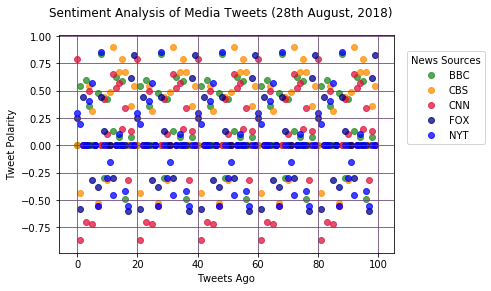

In [61]:
#Plot the News Compounds collected above

BBC_comp = BBC['Compound']
CBS_comp = CBS['Compound']
CNN_comp = CNN['Compound']
FOX_comp = FOX['Compound']
NYT_comp = NYT['Compound']

#Set Colors
color_scheme = {'forestgreen':'#228B22', 'darkorange':'#FF8C00', 'crimson':'#DC143C', 'darkblue':'#00008B', 'blue':'#0000FF'}
newscolors = {'BBC': color_scheme['forestgreen'], 'CBS': color_scheme['darkorange'], 'CNN': color_scheme['crimson'], 'FOX': color_scheme['darkblue'], 'NYT': color_scheme['blue']} 

#Scatter Plots
bbc_scatter = plt.scatter(np.arange(len(BBC_comp)), BBC_comp, marker = 'o', color = newscolors['BBC'] , label = 'BBC', alpha = .75)
cbs_scatter = plt.scatter(np.arange(len(CBS_comp)), CBS_comp, marker = 'o', color = newscolors['CBS'] , label = 'CBS', alpha = .75)
cnn_scatter = plt.scatter(np.arange(len(CNN_comp)), CNN_comp, marker = 'o', color = newscolors['CNN'] , label = 'CNN', alpha = .75)
fox_scatter = plt.scatter(np.arange(len(FOX_comp)), FOX_comp, marker = 'o', color = newscolors['FOX'] , label = 'FOX', alpha = .75)
nyt_scatter = plt.scatter(np.arange(len(NYT_comp)), NYT_comp, marker = 'o', color = newscolors['NYT'] , label = 'NYT', alpha = .75)

#Create Grid
plt.grid(True, color = '#694670')

#Label
plt.legend(handles=[bbc_scatter, cbs_scatter, cnn_scatter, fox_scatter, nyt_scatter], loc=(1.04,.5), title = 'News Sources')
plt.suptitle('Sentiment Analysis of Media Tweets (28th August, 2018)')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')


#Save as png
plt.savefig("Images/Sentiment_Analysis.png")

#Plot
plt.show()

Bar plot visualizing the overall sentiments 
--------------------------------------------------

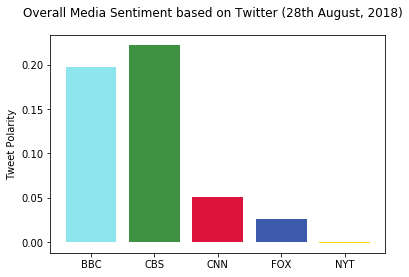

In [62]:
#Average each media compound
BBC_avg = BBC_comp.mean()
CBS_avg = CBS_comp.mean()
CNN_avg = CNN_comp.mean()
FOX_avg = FOX_comp.mean()
NYT_avg = NYT_comp.mean()

#x-axis and media values
news_avg = [BBC_avg, CBS_avg, CNN_avg, FOX_avg, NYT_avg]
x_axis = np.arange(len(news_avg))

#media colors
hexcodes = ['#8EE5EE', '#3D9140', '#DC143C', '#3D59AB', '#FFD700']

#change the values to media handles
tick_loactions = [value for value in x_axis]
plt.xticks(tick_loactions, ['BBC', 'CBS', 'CNN', 'FOX', 'NYT'])

#create bar chart
plt.bar(x_axis, news_avg, color = hexcodes)

#title and y axis label
plt.suptitle('Overall Media Sentiment based on Twitter (28th August, 2018)')
plt.ylabel('Tweet Polarity')

#Save as png
plt.savefig("Images/Overall_Media_Sentiment.png")

#plot bar chart
plt.show()

Observations
------------------------------------------
Note: These observations keep changing. Everytime I am running the code CNN, NYT and FOX are changing sides in the bar plot above. I can imagine that this is a reflection of what's being tweeted out tonight in these news channels, but this is not the space to have a specific discussion about the specific headlines :) ) 
1. BBC, CBS, CNN & NYT tweets are positive in nature.
2. FOX news tweets are negative in sentiments. 
3. Among the positive tweets, CBS has the highest score, while CNN has the least positive score.
4. The scatter plot shows that there are more positive sentiments compared to the negative ones. And there asignificant amount of neutral ones, just going by the concentration of blue dots at 0.0 tweet polarity.  